In [2]:
#from xlrd import open_workbook
#wb=open_workbook('train(kag)cat(unsort)xl.xlsx')

In [3]:
#print(wb)


In [4]:
import pandas as pd

In [5]:
wd=pd.read_excel('train(kag)cat(unsort)xl.xlsx')

In [6]:
wd.head()
wd.tail()
wd.info()
wd.describe

print(type(wd))
wd.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
train_id             1048575 non-null int64
name                 1048526 non-null object
item_condition_id    1048575 non-null int64
category_name        1044072 non-null object
Unnamed: 4           1044072 non-null object
Unnamed: 5           1044072 non-null object
brand_name           601240 non-null object
price                1048575 non-null float64
shipping             1048575 non-null int64
item_description     1047253 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 80.0+ MB
<class 'pandas.core.frame.DataFrame'>


(1048575, 10)

In [7]:
wd1=wd.drop(['name','item_description'],axis=1)
print(wd1)
wd1.isnull().sum()

         train_id  item_condition_id           category_name  \
0               0                  3                     Men   
1               1                  3             Electronics   
2               2                  1                   Women   
3               3                  1                    Home   
4               4                  1                   Women   
5               5                  3                   Women   
6               6                  3                   Women   
7               7                  3       Sports & Outdoors   
8               8                  3       Sports & Outdoors   
9               9                  3  Vintage & Collectibles   
10             10                  2                  Beauty   
11             11                  1                  Beauty   
12             12                  2                   Women   
13             13                  1                   Other   
14             14                  3    

train_id                  0
item_condition_id         0
category_name          4503
Unnamed: 4             4503
Unnamed: 5             4503
brand_name           447335
price                     0
shipping                  0
dtype: int64

In [8]:
type(wd1)
wd1=wd1.drop(['brand_name'],axis=1)

In [9]:
import numpy as np
wd1.isnull().sum()

train_id                0
item_condition_id       0
category_name        4503
Unnamed: 4           4503
Unnamed: 5           4503
price                   0
shipping                0
dtype: int64

In [10]:
wd1['category_name'].fillna('None',inplace=True)
wd1['Unnamed: 4'].fillna('other',inplace= True)
wd1['Unnamed: 5'].fillna('other',inplace=True)

In [11]:
wd1.head()
wd1.isnull().sum()
type(wd1)

pandas.core.frame.DataFrame

In [13]:
wd_samp=wd1.sample(1000000)
#print(wd_samp)
x=wd1.drop(['price'],axis=1)
y=pd.DataFrame()
y=wd1['price']
type(y)
type(x)
#x=wd['train_id','item_condition_id','category_name','Unnamed: 4','Unnamed: 5','shipping']
#x.head()

pandas.core.frame.DataFrame

In [14]:
type(wd_samp)
#wd_samp.info
wd_samp.dtypes
#wd_samp.shape
wd_samp = wd_samp.rename(columns = {'Unnamed: 4':'sub_cat'})
wd_samp= wd_samp.rename(columns = {'Unnamed: 5':'sub_sub_cat'})
wd_samp.category_name=wd_samp.category_name.astype('category')
wd_samp.sub_cat=wd_samp.sub_cat.astype('category')
wd_samp.sub_sub_cat=wd_samp.sub_sub_cat.astype('category')
wd_samp.dtypes
type(wd_samp)       

pandas.core.frame.DataFrame

In [15]:
print(wd_samp.category_name)
wd_samp.category_name = wd_samp.category_name.cat.codes
wd_samp.sub_cat=wd_samp.sub_cat.cat.codes
wd_samp.sub_sub_cat=wd_samp.sub_sub_cat.cat.codes

546109                      Women
568451                      Women
558560                      Women
78593                       Other
294155                        Men
779676                        Men
168243                Electronics
682242                      Women
684946                      Other
595865                      Women
612500                      Women
521209                   Handmade
704489                      Women
932591                      Women
863308                     Beauty
895191                      Women
793087          Sports & Outdoors
689203                      Women
667780                        Men
621019     Vintage & Collectibles
250850                      Women
623542                      Women
54218                       Women
994008                      Women
887112                      Women
227362                     Beauty
81415                         Men
87651                        Home
682339                     Beauty
655620        

In [16]:
wd_samp.dtypes
x=wd_samp.drop(['price'],axis=1)
y=pd.DataFrame()
y=wd_samp['price']
type(y)
type(y)

pandas.core.series.Series

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)
x_train.shape
#print x_train.shape
#print y_train.shape
#print x_test.shape
#print y_test.shape


(700000, 6)

In [30]:
#np.random.seed(123)
from sklearn import tree
dt=tree.DecisionTreeRegressor(max_depth=6,min_samples_split=500,min_impurity_decrease=.2)
#dt = dt(random_state=0, criterion="rmsle")
dt_fit = dt.fit(x_train, y_train)

In [31]:
dt_fit.score(x_train,y_train)


0.087077553189340406

In [32]:
preds=dt_fit.predict(x_test)

In [33]:
from sklearn.metrics import mean_squared_log_error
print(mean_squared_log_error(y_test, dt_fit.predict(x_test)))
print(dt_fit.score(x_test, y_test))

0.570052492504
0.0832944446104


In [51]:
dt_fit.feature_importances_

array([ 0.        ,  0.06834349,  0.23154784,  0.40679847,  0.20125865,
        0.09205156])

In [38]:
##########Decision tree with ada boost ######
from sklearn.ensemble import AdaBoostRegressor



In [45]:
dt_2 = AdaBoostRegressor(base_estimator=None,
                          n_estimators=300, random_state=123,loss='linear',learning_rate=.3)

In [46]:
dt_fit_2 = dt.fit(x_train, y_train)

In [47]:
dt_fit_2.score(x_train,y_train)

0.087077553189340406

In [49]:
preds_2=dt_fit_2.predict(x_test)

In [50]:
from sklearn.metrics import mean_squared_log_error
print(mean_squared_log_error(y_test, dt_fit_2.predict(x_test)))
print(dt_fit.score(x_test, y_test))

0.570052492504
0.0832944446104


In [52]:
dt_fit_2.feature_importances_

array([ 0.        ,  0.06834349,  0.23154784,  0.40679847,  0.20125865,
        0.09205156])

In [35]:
dt_fit.tree_

In [55]:
########### linear Regression ##########
from sklearn.linear_model import LinearRegression
lm=LinearRegression(fit_intercept=True,normalize=False)
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.012190581950332069

In [56]:
pred_lm=lm.predict(x_test)

In [57]:
from sklearn.metrics import mean_squared_log_error
print(mean_squared_log_error(y_test, lm.predict(x_test)))
print(lm.score(x_test, y_test))

0.636806169329
0.0118147536725


In [58]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [  4.96351707e-08  -1.15562432e+00   4.74509046e-01   1.09149540e-03
  -2.98863341e-03  -7.47391918e+00]


In [59]:
lm.intercept_

30.577869679595743

In [60]:
###------randomforrest regressor-------###
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor(n_jobs=-1, n_estimators=100,  random_state=42, min_samples_leaf=3)
rf2.fit(x_train,y_train)
rf2.score(x_train,y_train)

0.49357910460586685

In [67]:
pred_rf2=lm.predict(x_test)

In [68]:
from sklearn.metrics import mean_squared_log_error
print(mean_squared_log_error(y_test, rf2.predict(x_test)))
print(rf2.score(x_test, y_test))

0.509953825688
0.0916747884533


In [61]:
from pprint import pprint

In [62]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf2.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [64]:
preds_rf = rf2.predict(x_test)
preds_rf=pd.Series(preds_rf)


In [65]:
from sklearn.ensemble import RandomForestRegressor
rf3 = RandomForestRegressor(n_jobs=-1, n_estimators=100,  random_state=42, min_samples_leaf=100,max_depth=6)
rf3.fit(x_train,y_train)
rf3.score(x_train,y_train)

0.089927910761844365

In [66]:
pred_rf3=lm.predict(x_test)

In [69]:
from sklearn.metrics import mean_squared_log_error
print(mean_squared_log_error(y_test, rf3.predict(x_test)))
print(rf3.score(x_test, y_test))

0.566683440355
0.086320310481


In [70]:
######### extra tree regressor ########
from sklearn.ensemble import ExtraTreesRegressor

In [82]:
et=ExtraTreesRegressor(n_estimators = 100,oob_score=True,bootstrap =True,random_state=64,n_jobs=-1)
et_fit=et.fit(x_train,y_train)
et_fit.score(x_train,y_train)

0.85222105614034604

In [83]:
pred_et=et_fit.predict(x_test)

In [84]:
from sklearn.metrics import mean_squared_log_error
print(mean_squared_log_error(y_test, et_fit.predict(x_test)))
print(et_fit.score(x_test, y_test))

0.558620995891
-0.0547773286872


In [23]:
########## gradient boosting regressor ##############
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error
gbt=GradientBoostingRegressor()
gbt_fit=GradientBoostingRegressor(n_estimators=1000, learning_rate=.01,max_depth=3,random_state=0,loss='ls').fit(x_train,y_train)

#est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
#...     max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)

In [24]:
gbt_fit.score(x_train,y_train)

0.1376001647532954

In [25]:
preds_gbt=gbt_fit.predict(x_test)

In [26]:
from sklearn.metrics import mean_squared_log_error
print(mean_squared_log_error(y_test, gbt_fit.predict(x_test)))
print(gbt_fit.score(x_test, y_test))

0.527753615653
0.126907179812


In [ ]:
preds1=pd.Series(preds)
submit = pd.concat([x_test['train_id'],preds1],axis=1)
submit.columns = ['test_id','price']
submit.to_csv("./rf_v4.csv", index=True)

In [ ]:
######## xgb ########

In [74]:
from xgboost import XGBRegressor

F:\workinsofe\python\py\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [78]:
model = XGBRegressor()
xgb=model.fit(x_train, y_train)

In [79]:
xgb.score(x_train,y_train)

0.1330013240950485

In [80]:
preds_xgb=xgb.predict(x_test)

In [81]:
from sklearn.metrics import mean_squared_log_error
print(mean_squared_log_error(y_test, xgb.predict(x_test)))
print(xgb.score(x_test, y_test))

0.525579103963
0.12806682146


In [ ]:
##########  ANN ######
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers


In [ ]:
ann_model=Sequential()
ann_model.add(Dense(30,input_dim=6,activation='relu',kernel_initializer='normal'))
ann_model.add(Dense(12,input_dim=6,activation='relu',kernel_initializer='normal'))
ann_model.add(Dense(1,activation='relu',kernel_initializer='normal'))

In [ ]:
ann_model.compile(loss='mean_squared_logarithmic_error',optimizer='sgd',metrics=['msle'])

In [ ]:
model_history =ann_model.fit(x_train,y_train,epochs=100,batch_size=1024,validation_split=.2)

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [70]:
data = wd_drop
X, y_ = data["Unnamed: 5"], data.price

In [71]:
SR_y = pd.Series(y_, name="y_ (Target price)")


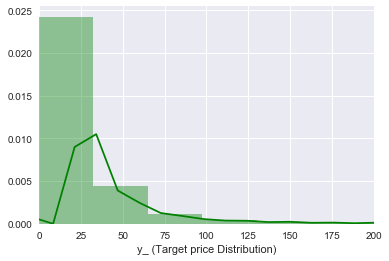

In [87]:
fig, ax = plt.subplots()
ax.set_xlim( 0,200)
sns.distplot(SR_y, color="g", ax=ax)

plt.show() 

In [ ]:
# doing clustering of data
#hierarchical or agglomerative clustering

# Agglomerative Clustering Model
agglomerative = cluster.AgglomerativeClustering(n_clusters=kClusters, linkage="ward")
agglomerative.fit(edgeMat)

# Transform our data to list form and store them in results list
results.append(list(agglomerative.labels_))
